<a href="https://colab.research.google.com/github/mohammedrefai20/Hand-Gesture-Classification/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [57]:
df = pd.read_csv('hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [58]:
df['label'].unique()

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

In [59]:
from sklearn.model_selection import train_test_split
X=df.drop('label', axis=1)
y=df['label']

In [60]:
df.shape

(25675, 64)

# Data Visualization

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# ── Load data ─────────────────────────────────────────────────────
df      = pd.read_csv("hand_landmarks_data.csv")   # ← change path
X       = df.drop(columns=['label']).values   # (25675, 63)
y       = df['label'].values
classes = np.unique(y)
colors  = plt.cm.tab20(np.linspace(0, 1, len(classes)))
color_map = {cls: colors[i] for i, cls in enumerate(classes)}

print(f"Shape  : {df.shape}")
print(f"Classes: {len(classes)} → {classes}")

# ── MediaPipe hand connections (for drawing skeleton) ─────────────
HAND_CONNECTIONS = [
    (0,1),(1,2),(2,3),(3,4),          # thumb
    (0,5),(5,6),(6,7),(7,8),          # index
    (0,9),(9,10),(10,11),(11,12),     # middle
    (0,13),(13,14),(14,15),(15,16),   # ring
    (0,17),(17,18),(18,19),(19,20),   # pinky
    (5,9),(9,13),(13,17)              # palm
]

def extract_xy(row):
    """Extract x,y coordinates from a flat 63-feature row (x,y,z per landmark)."""
    x_coords = [row[i*3]   for i in range(21)]
    y_coords = [row[i*3+1] for i in range(21)]
    return np.array(x_coords), np.array(y_coords)

def draw_hand(ax, x_coords, y_coords, color='steelblue', title=''):
    """Draw hand skeleton by connecting landmarks."""
    for start, end in HAND_CONNECTIONS:
        ax.plot([x_coords[start], x_coords[end]],
                [y_coords[start], y_coords[end]],
                color=color, linewidth=1.5, alpha=0.7)
    ax.scatter(x_coords, y_coords, c=color, s=40, zorder=5)
    # Label each landmark
    for i, (xi, yi) in enumerate(zip(x_coords, y_coords)):
        ax.annotate(str(i), (xi, yi), fontsize=5, ha='center', va='bottom')
    ax.set_title(title, fontsize=10)
    ax.invert_yaxis()   # match image coordinate system
    ax.set_aspect('equal')
    ax.axis('off')

Shape  : (25675, 64)
Classes: 18 → ['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']


/tmp/ipython-input-4137162914.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_coords, y_coords, c=color, s=40, zorder=5)


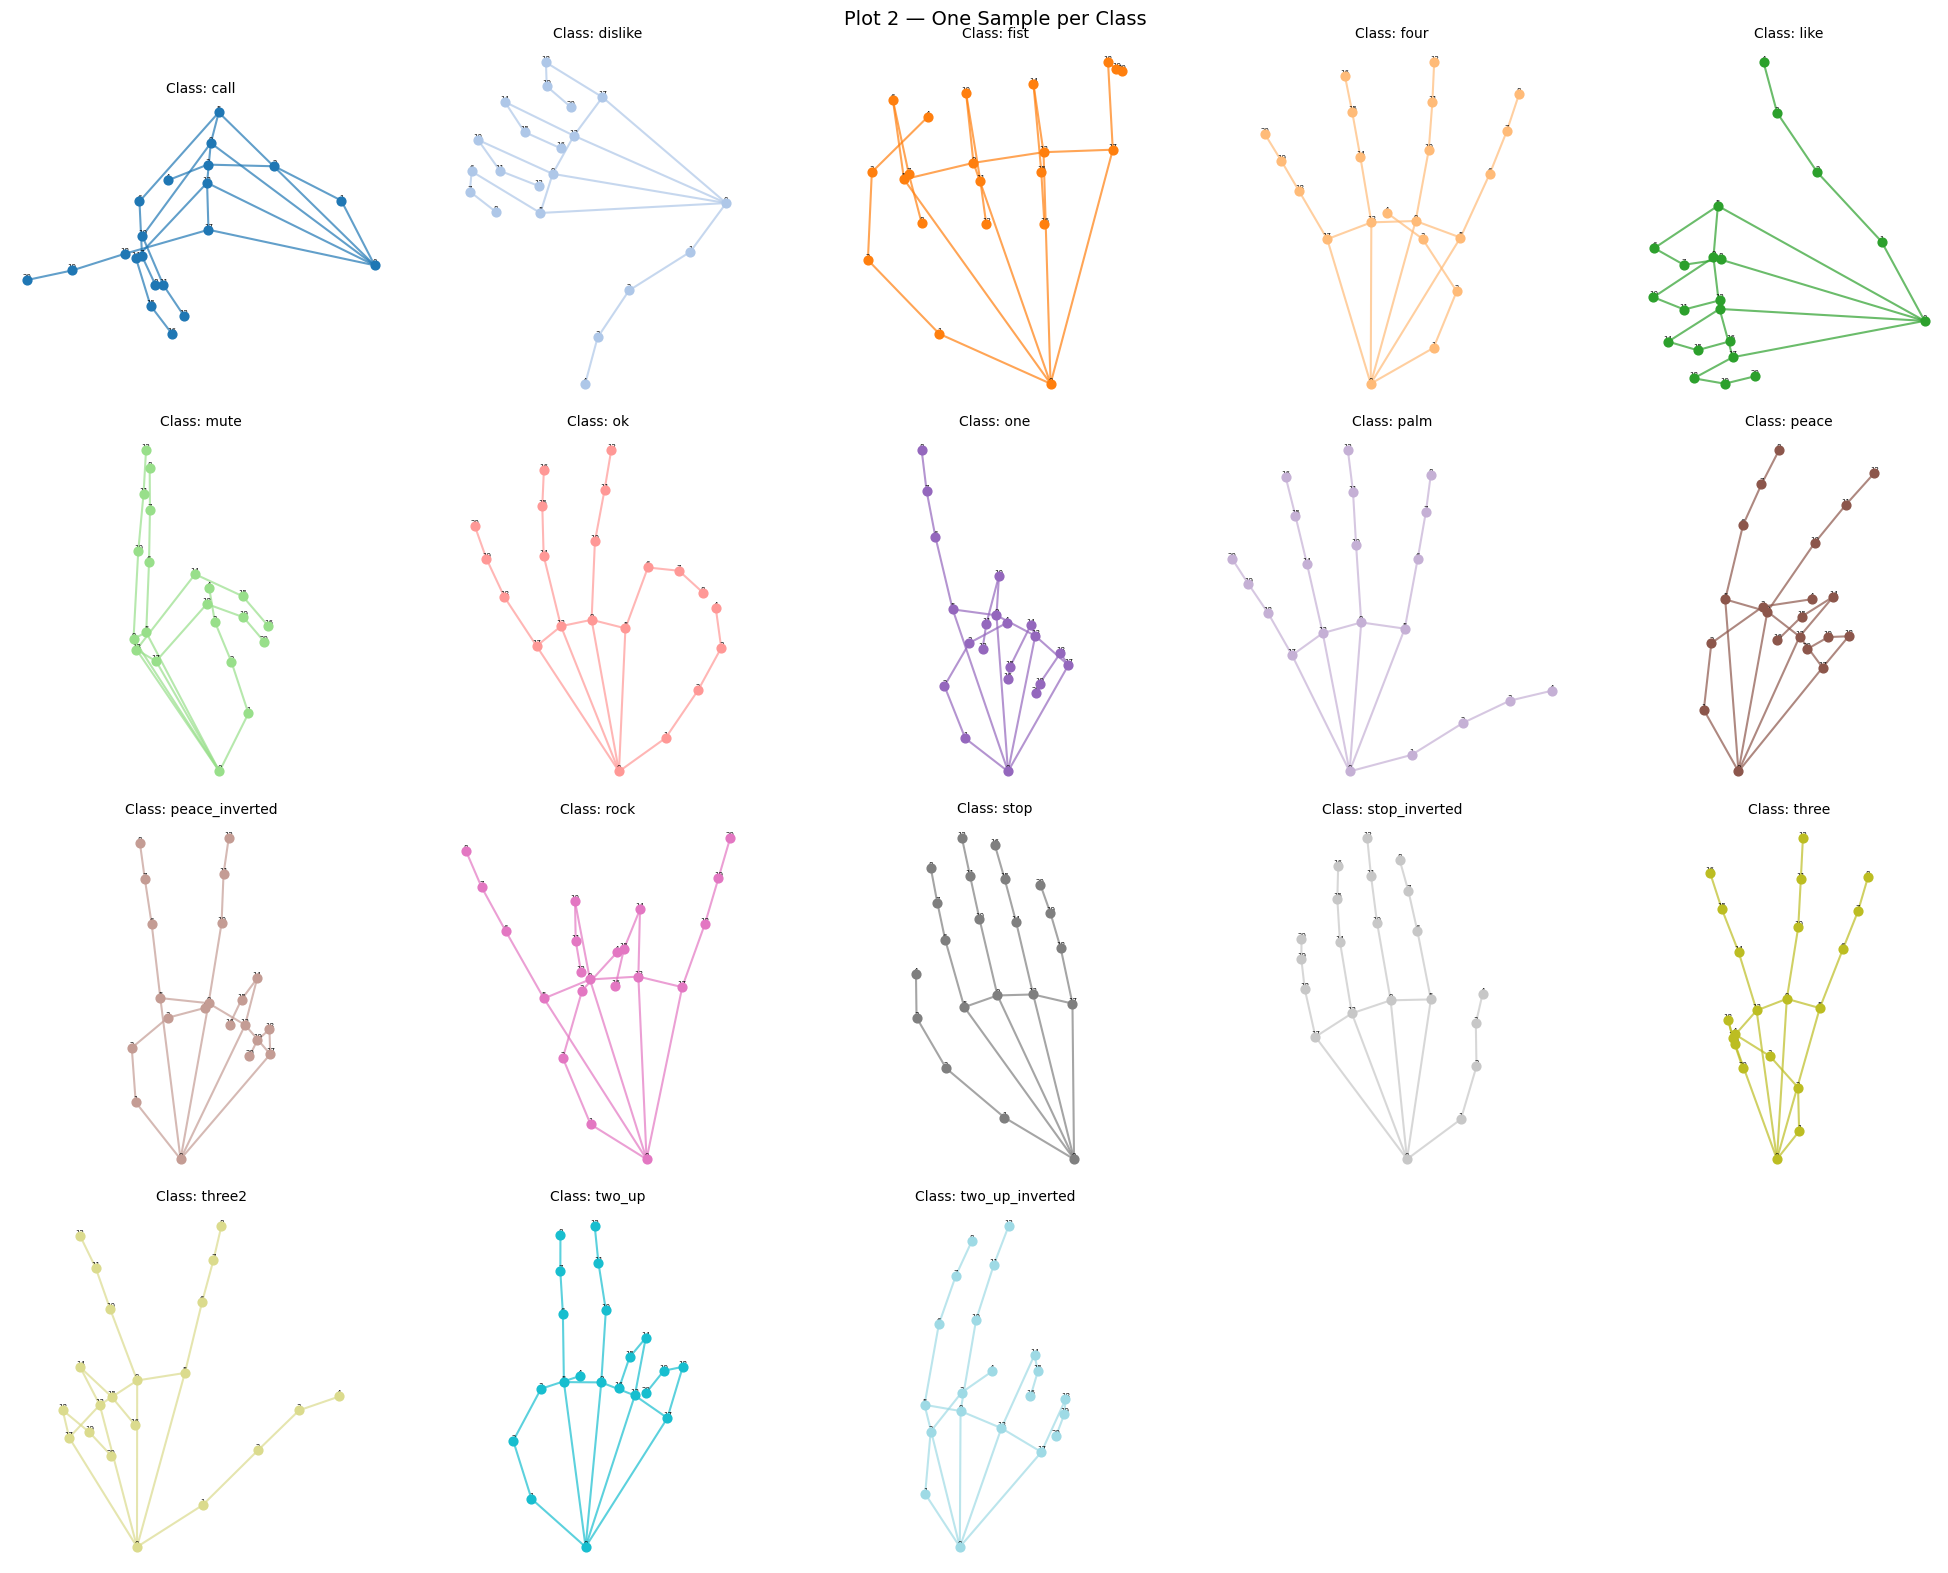

In [45]:
# PLOT 1 — One sample per class with skeleton

n_cols = 5
n_rows = int(np.ceil(len(classes) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

for i, cls in enumerate(classes):
    mask     = y == cls
    idx      = np.where(mask)[0][0]   # first sample of this class
    xc, yc   = extract_xy(X[idx])
    draw_hand(axes[i], xc, yc, color=color_map[cls],
              title=f"Class: {cls}")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Plot 2 — One Sample per Class", fontsize=14)
plt.tight_layout()
plt.savefig("plot2_sample_per_class.png", dpi=150)
plt.show()


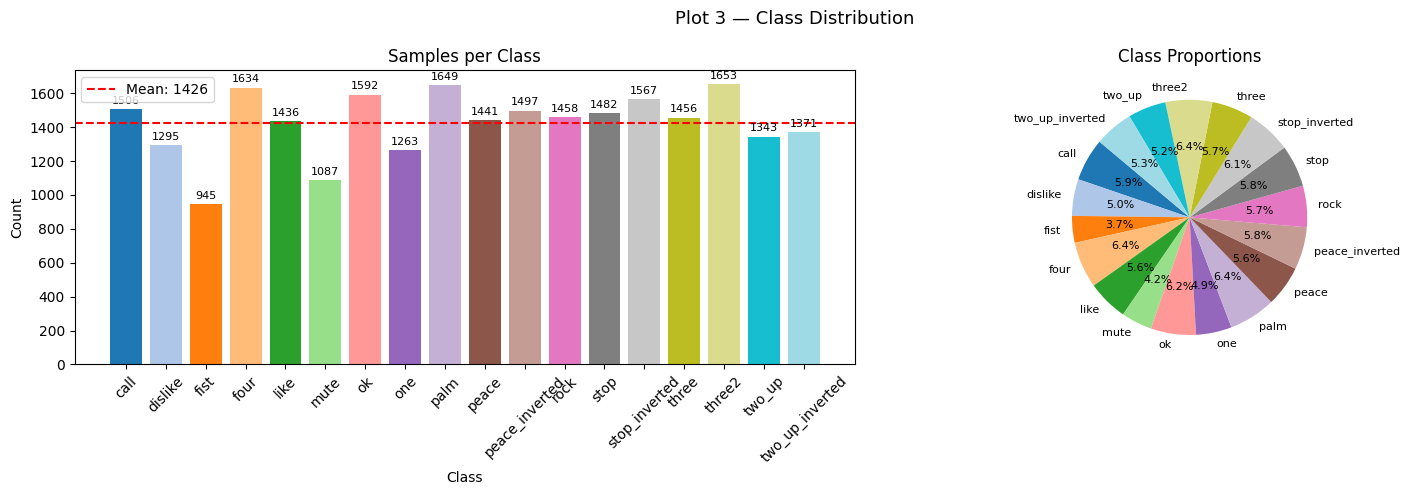


Imbalance ratio: 1.75x  (max=1653 [three2], min=945 [fist])


In [51]:
counts = pd.Series(y).value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bar chart
bars = axes[0].bar(counts.index, counts.values,
                   color=[color_map[c] for c in counts.index])
for bar, count in zip(bars, counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                 str(count), ha='center', va='bottom', fontsize=8)
axes[0].axhline(counts.mean(), color='red', linestyle='--',
                label=f'Mean: {int(counts.mean())}')
axes[0].set_title("Samples per Class")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# Pie chart — proportion view
axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%',
            colors=[color_map[c] for c in counts.index],
            startangle=140, textprops={'fontsize': 8})
axes[1].set_title("Class Proportions")

plt.suptitle("Plot 3 — Class Distribution", fontsize=13)
plt.tight_layout()
plt.savefig("plot3_class_distribution.png", dpi=150)
plt.show()

imbalance = counts.max() / counts.min()
print(f"\nImbalance ratio: {imbalance:.2f}x  "
      f"(max={counts.max()} [{counts.idxmax()}], "
      f"min={counts.min()} [{counts.idxmin()}])")

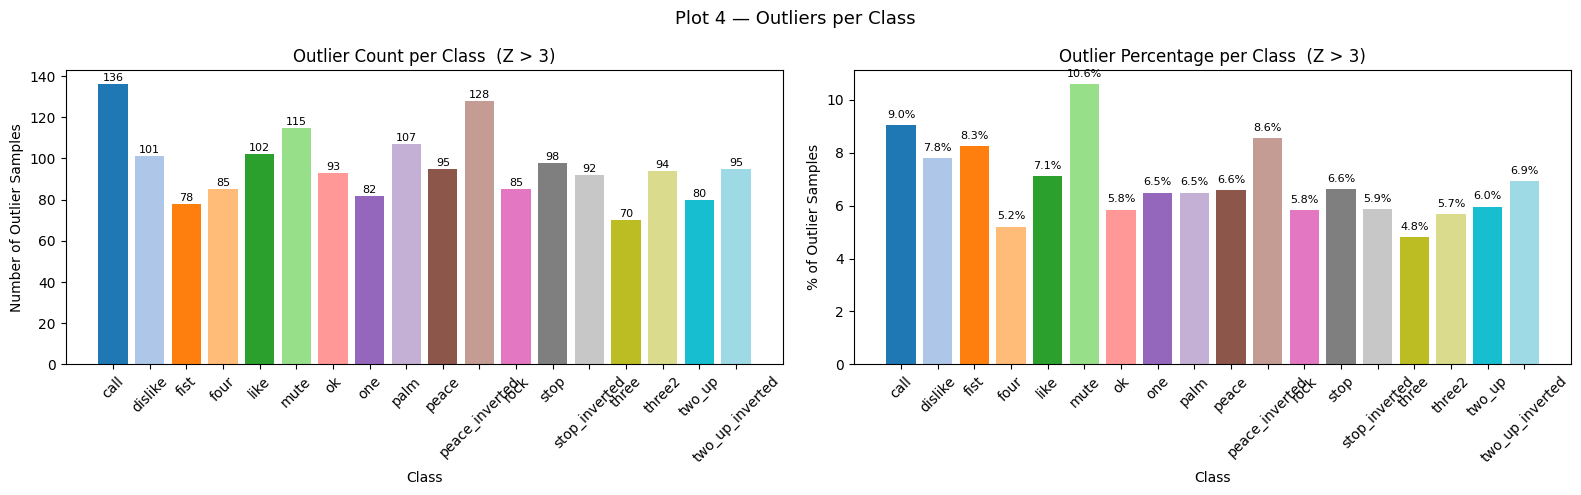

In [54]:
# PLOT 4 — Outliers per class (Z-score method)

Z_THRESHOLD = 3

outlier_counts_per_class = {}
outlier_pct_per_class    = {}

for cls in classes:
    mask       = y == cls
    X_cls      = X[mask]
    z          = np.abs(stats.zscore(X_cls, axis=0))
    # a sample is an outlier if ANY of its features has z > threshold
    is_outlier = (z > Z_THRESHOLD).any(axis=1)
    outlier_counts_per_class[cls] = is_outlier.sum()
    outlier_pct_per_class[cls]    = 100 * is_outlier.mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Absolute count
bars = axes[0].bar(outlier_counts_per_class.keys(),
                   outlier_counts_per_class.values(),
                   color=[color_map[c] for c in outlier_counts_per_class])
for bar, val in zip(bars, outlier_counts_per_class.values()):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 str(val), ha='center', va='bottom', fontsize=8)
axes[0].set_title(f"Outlier Count per Class  (Z > {Z_THRESHOLD})")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Number of Outlier Samples")
axes[0].tick_params(axis='x', rotation=45)

# Percentage
bars2 = axes[1].bar(outlier_pct_per_class.keys(),
                    outlier_pct_per_class.values(),
                    color=[color_map[c] for c in outlier_pct_per_class])
for bar, val in zip(bars2, outlier_pct_per_class.values()):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                 f"{val:.1f}%", ha='center', va='bottom', fontsize=8)
axes[1].set_title(f"Outlier Percentage per Class  (Z > {Z_THRESHOLD})")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("% of Outlier Samples")
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle("Plot 4 — Outliers per Class", fontsize=13)
plt.tight_layout()
plt.show()


# Preprocessing


1.   Subtract all point of x,y from x0,y0
2.   calculate norm of x12,y12 and divide all points of x,y on this norm




In [61]:
for axis in ['x', 'y']:
    base_col = f'{axis}1'
    cols = [f'{axis}{i}' for i in range(2, 22)]
    X[cols] = X[cols].sub(X[base_col], axis=0)

In [62]:
norm = np.sqrt(X['x12']**2 + X['y12']**2)
norm = norm.replace(0, np.nan)
X_col = [f'x{i}' for i in range(1, 22)]
y_col = [f'y{i}' for i in range(1, 22)]
X[X_col] = X[X_col].div(norm, axis=0)
X[y_col] = X[y_col].div(norm, axis=0)

# Data Splitting

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20540, 63), (5135, 63), (20540,), (5135,))

In [65]:
X_train.head(3)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
7330,3.475524,5.011933,-7.949529e-08,0.382371,-0.116283,-0.006374,0.611639,-0.289616,-0.017884,0.808025,...,-0.039041,0.669639,-0.633505,-0.050576,0.601315,-0.462675,-0.045012,0.452230,-0.417500,-0.038280
19295,4.997889,2.683518,1.827579e-07,0.211663,-0.157229,-0.004533,0.291986,-0.373925,-0.007546,0.205355,...,-0.019523,-0.301546,-0.631667,-0.025103,-0.323085,-0.758427,-0.028301,-0.338992,-0.865745,-0.030005
13987,1.602412,3.766964,3.728866e-07,-0.140141,-0.225459,-0.001540,-0.125720,-0.418897,-0.008423,0.016992,...,-0.033196,0.236414,-0.461642,-0.034893,0.187719,-0.414453,-0.027841,0.166363,-0.349398,-0.020865


# Learning Phase

In [88]:
#Sklearn Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import f1_score

#KNN Model

In [67]:
knn = KNeighborsClassifier(n_neighbors=11,weights='distance',metric='manhattan')
cv_scores = cross_val_score(knn,X_train,y_train,cv=3,scoring='f1_macro')
#Scores of cross validation
print("Cross Validation Scores:", cv_scores)

#mean score of the 3 folds = score of the knn model
print("Mean CV Score:", np.mean(cv_scores))

Cross Validation Scores: [0.93471338 0.93612187 0.93534179]
Mean CV Score: 0.9353923466104082


In [68]:
#fit model on whole data
knn.fit(X_train, y_train)

#predict the performane of the model
y_pred_knn = knn.predict(X_test)

#calculte f1 score on test split
f1 = f1_score(y_test, y_pred_knn,average='macro')
print("Test F1 Score:", f1)

Test F1 Score: 0.945384052835847


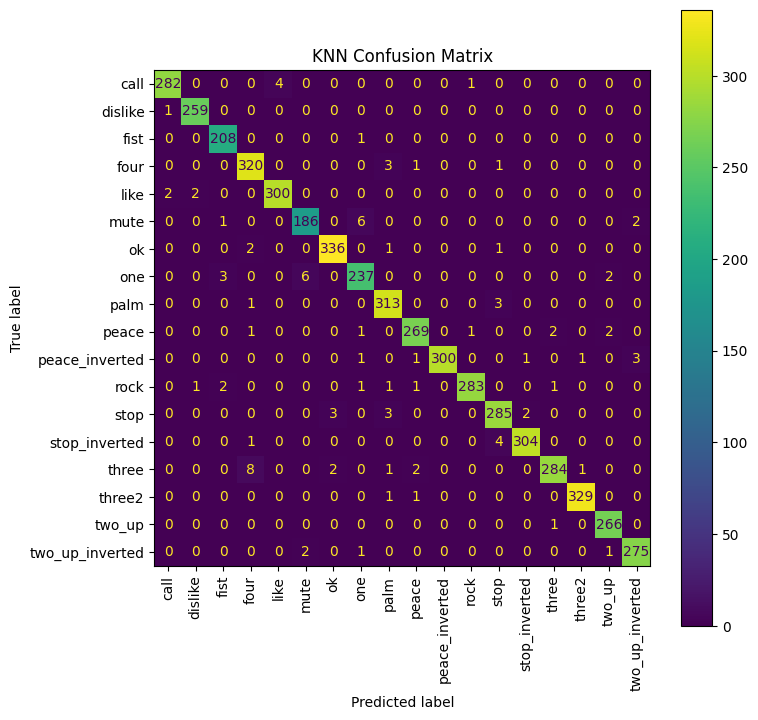

In [82]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(8,8))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_knn,
    display_labels=knn.classes_
)

disp.plot(ax=ax)

# Rotate x-axis labels correctly
plt.xticks(rotation=90)

plt.title("KNN Confusion Matrix")
plt.show()

In [72]:
# Classification Report
report = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

           call       0.99      0.95      0.97       287
        dislike       1.00      1.00      1.00       260
           fist       0.98      0.99      0.98       209
           four       0.94      0.94      0.94       325
           like       0.96      0.99      0.97       304
           mute       0.96      0.98      0.97       195
             ok       0.96      0.95      0.96       340
            one       0.95      0.93      0.94       248
           palm       0.94      0.95      0.94       317
          peace       0.88      0.86      0.87       276
 peace_inverted       0.92      0.90      0.91       307
           rock       0.98      0.98      0.98       290
           stop       0.90      0.91      0.91       293
  stop_inverted       0.90      0.97      0.93       309
          three       0.99      0.93      0.96       298
         three2       1.00      0.98      0.99       331
      

#SVM Model

In [73]:
svm = SVC(C=130,gamma=0.05,kernel='rbf',random_state=42)
cv_scores = cross_val_score(svm,X_train,y_train,cv=3,scoring='f1_macro')

#Scores of cross validation
print("Cross Validation Scores:", cv_scores)

#mean score of the 3 folds = score of the svm model
print("Mean CV Score:", np.mean(cv_scores))


Cross Validation Scores: [0.97941763 0.98065003 0.9820154 ]
Mean CV Score: 0.9806943502005918


In [74]:
#fit model on whole data
svm.fit(X_train, y_train)

#predict the performane of the model
y_pred_svm = svm.predict(X_test)

#calculte f1 score on test split
f1 = f1_score(y_test, y_pred_svm,average='macro')
print("Test F1 Score:", f1)

Test F1 Score: 0.9800780256237123


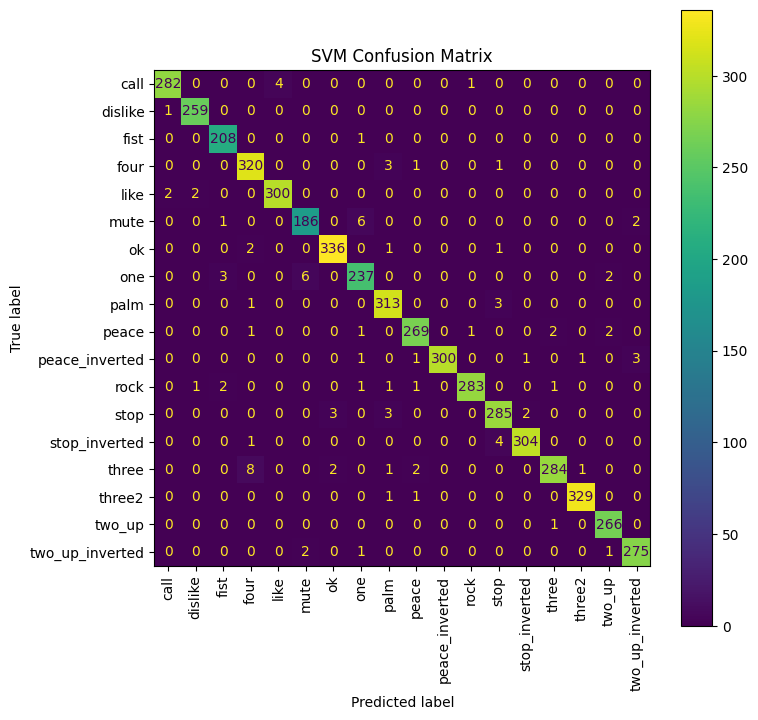

In [83]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plt.subplots(figsize=(8,8))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_svm,
    display_labels=svm.classes_
)

disp.plot(ax=ax)

# Rotate x-axis labels correctly
plt.xticks(rotation=90)

plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", report)

# RandomForestClassifier Model

In [85]:
rf=RandomForestClassifier(n_estimators=500,max_depth=11,random_state=42)
cv_scores = cross_val_score(rf,X_train,y_train,cv=3,scoring='f1_macro')

#Scores of cross validation
print("Cross Validation Scores:", cv_scores)

#mean score of the 3 folds = score of the svm model
print("Mean CV Score:", np.mean(cv_scores))

Cross Validation Scores: [0.9492583  0.95349348 0.95583422]
Mean CV Score: 0.9528620018810456


In [91]:
#fit model on whole data
rf.fit(X_train, y_train)

#predict the performane of the model
y_pred_rf = svm.predict(X_test)

#calculte f1 score on test split
f1 = f1_score(y_test, y_pred_rf,average='macro')
print("Test F1 Score:", f1)

Test F1 Score: 0.9800780256237123


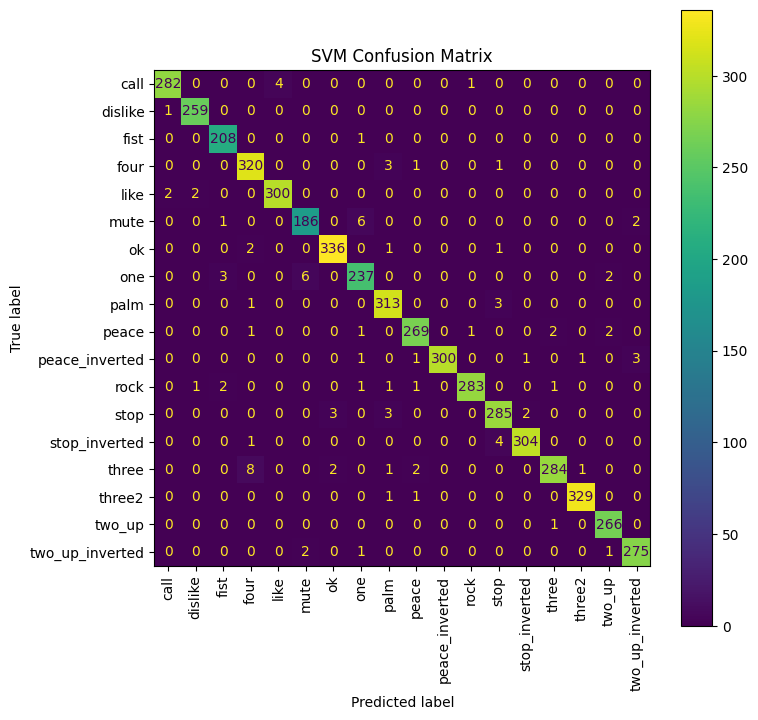

In [92]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(8,8))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf,
    display_labels=rf.classes_
)

disp.plot(ax=ax)

# Rotate x-axis labels correctly
plt.xticks(rotation=90)

plt.title("RF Confusion Matrix")
plt.show()

In [93]:
# Classification Report
report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

           call       0.99      0.98      0.99       287
        dislike       0.99      1.00      0.99       260
           fist       0.97      1.00      0.98       209
           four       0.96      0.98      0.97       325
           like       0.99      0.99      0.99       304
           mute       0.96      0.95      0.96       195
             ok       0.99      0.99      0.99       340
            one       0.96      0.96      0.96       248
           palm       0.97      0.99      0.98       317
          peace       0.98      0.97      0.98       276
 peace_inverted       1.00      0.98      0.99       307
           rock       0.99      0.98      0.98       290
           stop       0.97      0.97      0.97       293
  stop_inverted       0.99      0.98      0.99       309
          three       0.99      0.95      0.97       298
         three2       0.99      0.99      0.99       331
      

# AdaBoostClassifier Using DecisionTree Model

In [ ]:
base_model=DecisionTreeClassifier(max_depth=11, random_state=42)
adb = AdaBoostClassifier(estimator=base_model,learning_rate=0.5,n_estimators=600)
cv_scores = cross_val_score(adb,X_train,y_train,cv=3,scoring='f1_macro')

#Scores of cross validation
print("Cross Validation Scores:", cv_scores)

#mean score of the 3 folds = score of the svm model
print("Mean CV Score:", np.mean(cv_scores))



In [ ]:
#fit model on whole data
adb.fit(X_train, y_train)

#predict the performane of the model
y_pred_adb = adb.predict(X_test)

#calculte f1 score on test split
f1 = f1_score(y_test, y_pred_adb,average='macro')
print("Test F1 Score:", f1)

F1 Score (AdaBoost): 0.9421630027291806
                 precision    recall  f1-score   support

           call       0.99      0.99      0.99       287
        dislike       1.00      0.99      1.00       260
           fist       0.99      0.99      0.99       209
           four       0.96      0.98      0.97       325
           like       0.99      0.98      0.99       304
           mute       0.96      0.95      0.96       195
             ok       0.99      0.99      0.99       340
            one       0.94      0.96      0.95       248
           palm       0.98      0.98      0.98       317
          peace       0.81      0.71      0.76       276
 peace_inverted       0.87      0.82      0.84       307
           rock       0.99      0.99      0.99       290
           stop       0.94      0.99      0.96       293
  stop_inverted       0.99      0.96      0.98       309
          three       0.99      0.96      0.98       298
         three2       0.99      0.99      0.99 

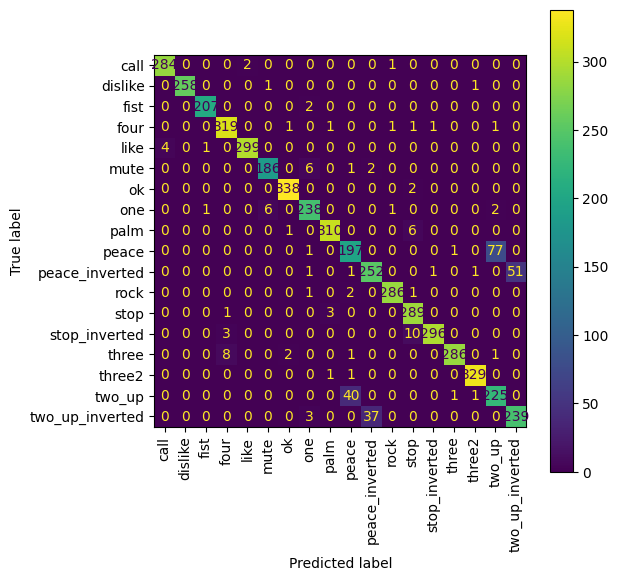

In [ ]:
cm_adb = confusion_matrix(y_test, y_pred_adb)
fig, ax = plt.subplots(figsize=(8,8))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_adb,
    display_labels=adb.classes_
)

disp.plot(ax=ax)

# Rotate x-axis labels correctly
plt.xticks(rotation=90)

plt.title("adb Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
report = classification_report(y_test, y_pred_adb)
print("Classification Report:\n", report)